#Leak Detection in Smart Water-Distribution System Using ANNs

##Library Imports

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import os
import sys


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.layers import Dense, Input, Dropout, Activation ,Activation
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Sequential
from keras import regularizers
from keras.utils import np_utils
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from keras.utils import plot_model
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving complete_dataset.csv to complete_dataset.csv


In [ ]:
import io
trainingdata = pd.read_csv(io.BytesIO(uploaded['training_data.csv']))
testingdata = pd.read_csv(io.BytesIO(uploaded['testing_data.csv']))
alldata = pd.read_csv(io.BytesIO(uploaded['complete_dataset.csv']))

KeyError: ignored

## Data Analysis

In [ ]:
alldata.head()

,NO,DATE,TIME,PT01,PT04,PT05,PT06,PRESSURE,TT01,TT03,SOLARFM,FLOW05,FLOW06,FLOW07,FLOW08,FLOW09,FLOW10,FLOW11,FLOW12,FLOW13,FLOW14,FLOW,VIBRATION,LEAK,NO LEAK
0,1,11/19/2019,17:21:03,1.369602,1.235312,1.207462,1.159393,1.352434,25.995728,25.934687,1.061193,17.170340,0.2409,0.1864,0.0,0.0767,0.0354,0.0,0.1944,0.3493,0.4783,0.6428,19.412374,1,0
1,2,11/19/2019,17:21:13,1.368076,1.233786,1.206699,1.159774,1.352052,26.003357,25.919426,1.033725,17.170340,0.2409,0.1864,0.0,0.0767,0.0354,0.0,0.1944,0.3493,0.4783,0.6428,19.412374,1,0
2,3,11/19/2019,17:21:23,1.369983,1.235694,1.207081,1.158248,1.353578,26.003357,25.927055,1.037387,17.097902,0.2397,0.1575,0.0,0.0547,0.0275,0.0,0.1926,0.3493,0.4723,0.6321,19.251724,1,0
3,4,11/19/2019,17:21:33,1.368457,1.234168,1.207081,1.156341,1.352434,25.995728,25.911797,1.043797,17.097902,0.2397,0.1646,0.0,0.0555,0.0302,0.0,0.1952,0.3493,0.4723,0.6321,19.251724,1,0
4,5,11/19/2019,17:21:43,1.367694,1.233405,1.205173,1.156722,1.350526,25.995728,25.934687,1.061193,17.097902,0.2397,0.1646,0.0,0.0555,0.0302,0.0,0.1952,0.3493,0.4723,0.6321,19.251724,1,0


In [ ]:
cor=alldata.corr()

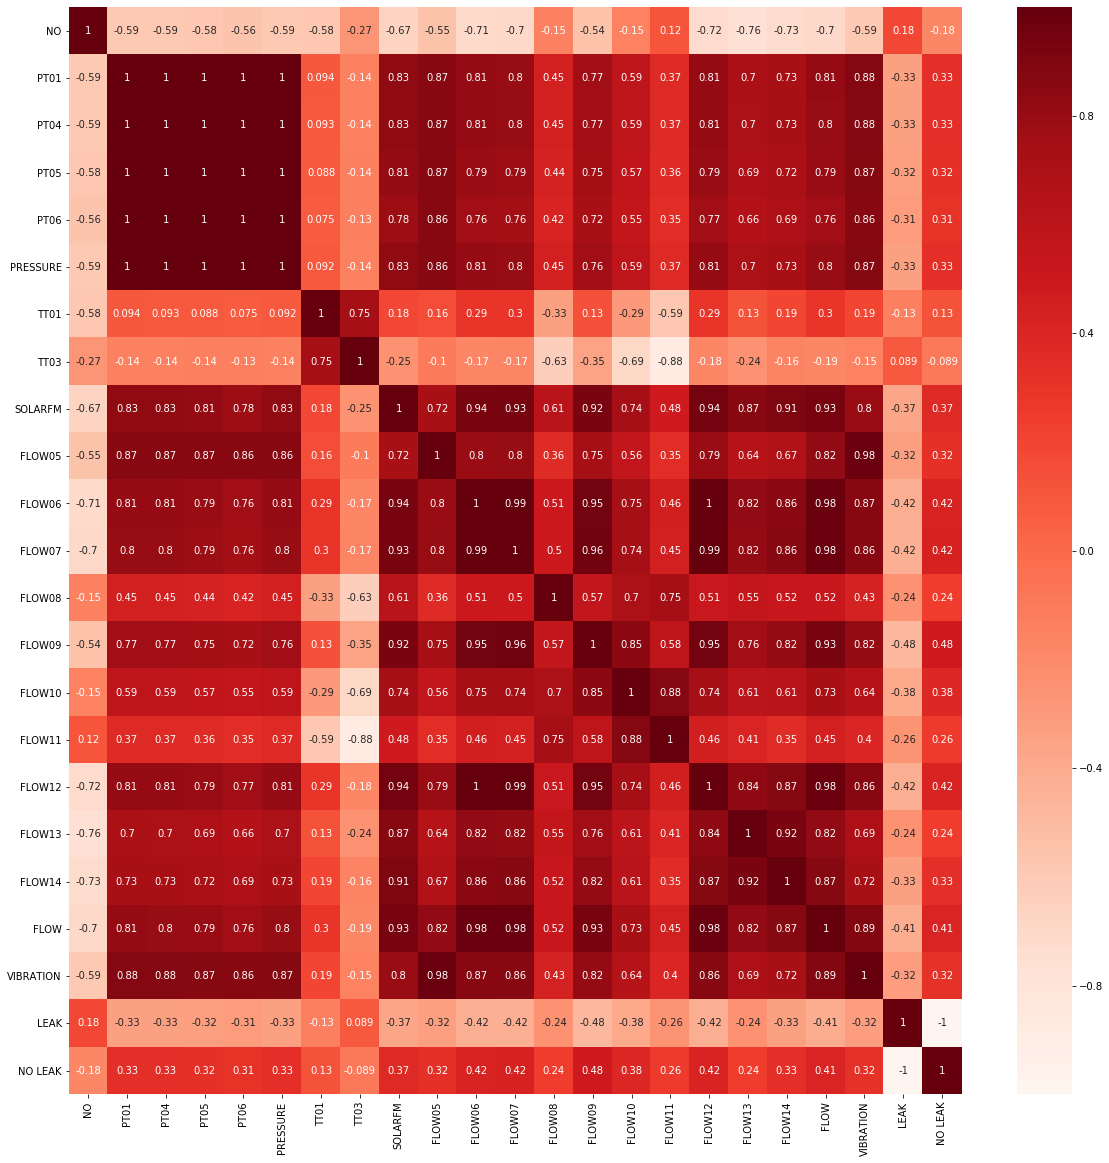

In [ ]:
#Retrieve corelation matrix between differnet parameters
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#retrieving corelation of various parameters on leak
cor_target = abs(cor["LEAK"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

NO           0.184278
PT01         0.334677
PT04         0.333949
PT05         0.324602
PT06         0.307970
PRESSURE     0.333529
TT01         0.127283
TT03         0.089059
SOLARFM      0.373027
FLOW05       0.324155
FLOW06       0.420611
FLOW07       0.423865
FLOW08       0.243933
FLOW09       0.483022
FLOW10       0.382890
FLOW11       0.255376
FLOW12       0.417994
FLOW13       0.244161
FLOW14       0.330882
FLOW         0.410567
VIBRATION    0.316683
LEAK         1.000000
NO LEAK      1.000000
Name: LEAK, dtype: float64

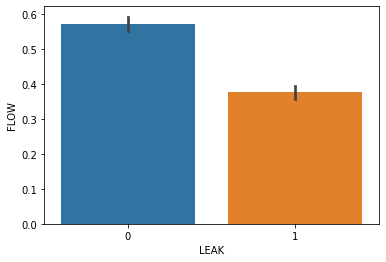

In [ ]:
#Average Value of flow in case of no leak (blue) and leak (orange)
#Large variation backs up the heavy dependence of flow on leak
sns.barplot(x='LEAK',y='FLOW',data=alldata)

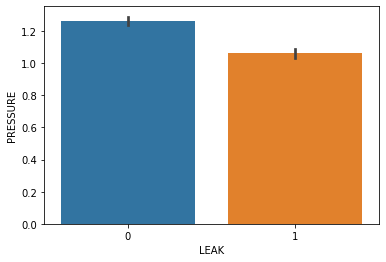

In [ ]:
#Average Value of pressure in case of no leak (blue) and leak (orange)
#Large variation backs up the heavy dependence of pressure on leak
sns.barplot(x='LEAK',y='PRESSURE',data=alldata)

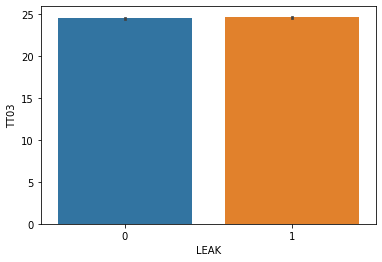

In [ ]:
#Average Value of temperature in case of no leak (blue) and leak (orange)
sns.barplot(x='LEAK',y='TT03',data=alldata)

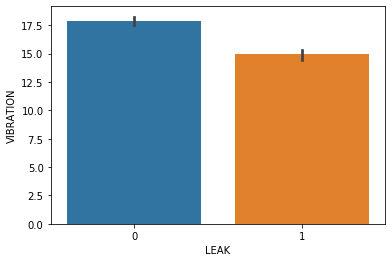

In [ ]:
#Average Value of flow in case of no leak (blue) and leak (orange)
#Large variation backs up the heavy dependence of vibration of a pipe on leak
sns.barplot(x='LEAK',y='VIBRATION',data=alldata)

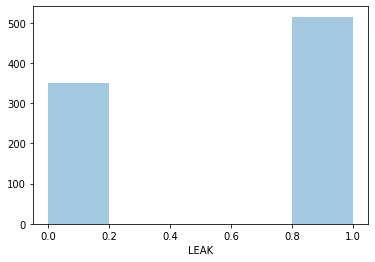

In [ ]:
sns.distplot(alldata['LEAK'],kde=False)

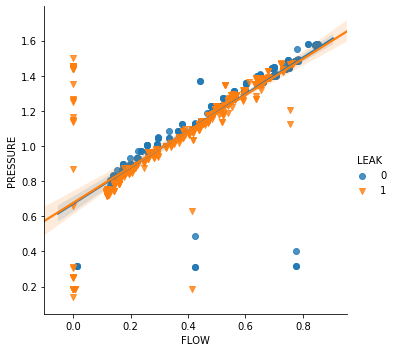

In [ ]:
#Pressure vs. Flow relation in case of a leak and no leak
sns.lmplot(x='FLOW',y='PRESSURE',data=alldata,hue='LEAK', markers=['o','v'])

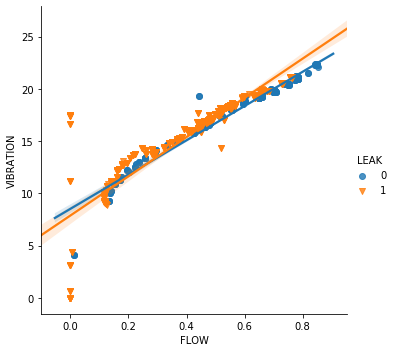

In [ ]:
#Vibration vs. Flow relation in case of a leak and no leak
sns.lmplot(x='FLOW',y='VIBRATION',data=alldata,hue='LEAK', markers=['o','v'])

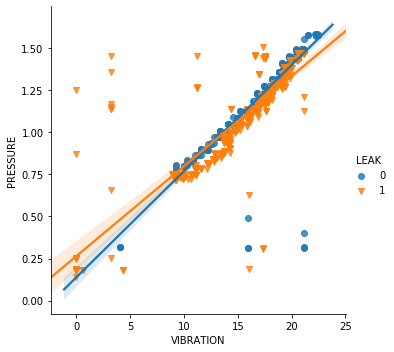

In [ ]:
#Vibration vs. Pressure relation in case of a leak and no leak
sns.lmplot(x='VIBRATION',y='PRESSURE',data=alldata,hue='LEAK', markers=['o','v'])

##Data Loading and Shuffling

In [ ]:
tr=trainingdata.to_numpy()
te=testingdata.to_numpy()
xtrain=tr[:,1:21] #training data input
ytrain=tr[:,21:23] #training data's ground truth
xtest=te[:,1:21] #testing data input
ytest=te[:,21:23] #testing data ground truth

In [ ]:
def shuffle_in_unison(a, b): # Inplace shuffling
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a,b

In [ ]:
xtrain,ytrain = shuffle_in_unison(xtrain,ytrain)
xtest,ytest = shuffle_in_unison(xtest,ytest)

##Model Training

In [ ]:
model=Sequential()
model.add(Dense(4,input_dim=20,activation='relu',use_bias='True',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
#model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adadelta', metrics=['accuracy'])
model.summary()
history_model=model.fit(xtrain,ytrain,epochs=100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 84        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 10        
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
766/766 [==============================] - 1s 738us/step - loss: 0.8911 - acc: 0.5927
Epoch 2/100
766/766 [==============================] - 0s 43us/step - loss: 0.8496 - acc: 0.6018
Epoch 3/100
766/766 [==============================] - 0s 39us/step - loss: 0.8148 - acc: 0.6097
Epoch 4/100
766/766 [==============================] - 0s 50us/step - loss: 0.7869 - acc: 0.6090
Epoch 5/100
766/766 [==============================] - 0s 40us/step - loss: 0.7631 - acc: 0.6155
Epoch 6/100
766/766 [=============

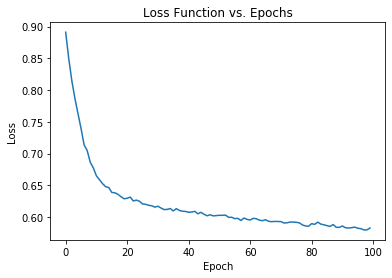

In [ ]:
#to plot model performance measures
history = history_model

plt.plot(history.history['loss'])
plt.title('Loss Function vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

##Model Testing

In [ ]:
#Test the model based on testing data and obtain confusion matrix, precision, recall, accuracy and F1-score
def getresults(model,data_test,y_test,batch):
    y_pred = model.predict(data_test,batch_size=batch)
    print(metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print(metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

In [ ]:

getresults(model,xtest,ytest,1)
print('Legends - \n 0 : leak \n 1 : no leak')

[[59  2]
 [ 6 33]]
              precision    recall  f1-score   support

           0      0.908     0.967     0.937        61
           1      0.943     0.846     0.892        39

    accuracy                          0.920       100
   macro avg      0.925     0.907     0.914       100
weighted avg      0.921     0.920     0.919       100

Legends - 
 0 : leak 
 1 : no leak


### Observations (For Test Data) -



*   Leak classified as no leak = 2/61
*   No leak classified as leak = 6/39


*   Precision - Out of all predicted as positive (TP +FP), how many of them were actually positive (TP)
*   Recall - Out of all actually positive (TP+FN), how many of them were predicted positive (TP)

For Leak,
Precision=92.5%
and Recall=90.7%



   

